In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import statistics

from pathlib import Path
from scipy import stats
from scipy.stats import trim_mean

#设置数据文件夹路径
DATA = Path().resolve()  / 'data'

In [2]:
df = pd.read_csv(DATA/'SoftDrink.csv')
df.head()

,Brand Purchased
0,Coca-Cola
1,Diet Coke
2,Pepsi
3,Diet Coke
4,Coca-Cola


# 汇总分类变量的数据

## 频数分布

频数分布表示在几个互不重叠的组别中，每一组项目的个数（频数）。

In [3]:
df.value_counts()

Brand Purchased
Coca-Cola          19
Pepsi              13
Diet Coke           8
Dr. Pepper          5
Sprite              5
dtype: int64

In [4]:
df['Brand Purchased'].value_counts()

Coca-Cola     19
Pepsi         13
Diet Coke      8
Dr. Pepper     5
Sprite         5
Name: Brand Purchased, dtype: int64

In [5]:
pd.crosstab(index=df['Brand Purchased'], columns='count')

col_0,count
Brand Purchased,
Coca-Cola,19
Diet Coke,8
Dr. Pepper,5
Pepsi,13
Sprite,5


## 相对频数分布和百分数频数分布

$$组的相对频数 = \frac{组的频数}{n}$$

In [6]:
def rel_freq(x):
    freqs = [(value, x.count(value) / len(x)) for value in set(x)] 
    return freqs
rel_freq(list(df['Brand Purchased']))

[('Dr. Pepper', 0.1),
 ('Sprite', 0.1),
 ('Pepsi', 0.26),
 ('Diet Coke', 0.16),
 ('Coca-Cola', 0.38)]

## 条形图和饼图



<AxesSubplot:>

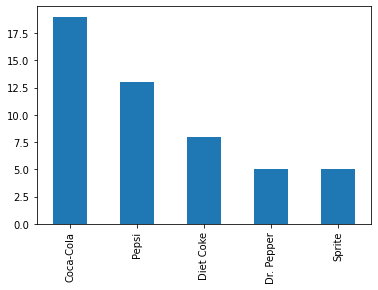

In [7]:
df['Brand Purchased'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Brand Purchased'>

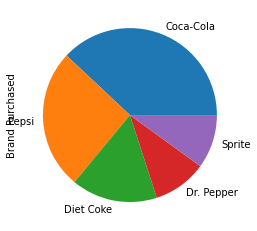

In [8]:
df['Brand Purchased'].value_counts().plot(kind='pie')

# 汇总数量变量的数据

## 频数分布



In [9]:
audit = pd.read_csv(DATA / 'AuditTime.csv')
audit.head()

,Audit Time
0,12
1,15
2,20
3,22
4,14


In [10]:
audit['bin'] = pd.cut(audit['Audit Time'], [0, 14, 19, 24, 29, 34])
audit.groupby('bin').size()

bin
(0, 14]     4
(14, 19]    8
(19, 24]    5
(24, 29]    2
(29, 34]    1
dtype: int64

<AxesSubplot:xlabel='bin'>

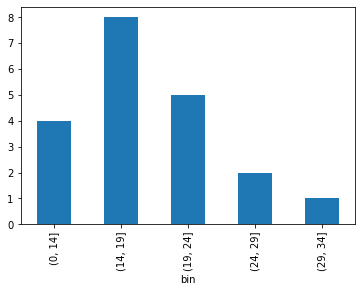

In [11]:
audit.groupby('bin').size().plot.bar()

In [12]:
audit.groupby('bin').size().cumsum()

bin
(0, 14]      4
(14, 19]    12
(19, 24]    17
(24, 29]    19
(29, 34]    20
dtype: int64

<AxesSubplot:xlabel='bin'>

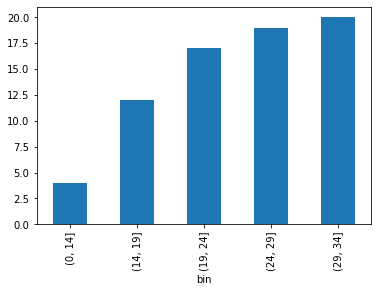

In [13]:
audit.groupby('bin').size().cumsum().plot.bar()

# 用频数分布表和直方图，刻画数据的特征

我们在日常生活中多多少少都会使用数据。但是，光浏览原始数据，单纯列举数字，是没有任何意义的。

“打眼一瞧什么都不明白”这一点上，数据也好，现实也罢，都是一样的。

例如我们现在有一个数据，记录了 40 位完赛全程马拉松跑者的年龄。

In [14]:
#marathon = pd.read_csv(DATA / 'Marathon.csv')
marathon = pd.DataFrame({'Age': [49,44,50,46,31,27,52,72,33,46,52,24,43,44,43,26,40,57,43,30,50,35,66,59,37,55,64,37,36,31,31,21,56,32,40,43,61,43,50,47]})
marathon.index += 1
marathon.head(5)

,Age
1,49
2,44
3,50
4,46
5,31


假设我们现在对数据一无所知，但是从常识出发，对于人类的年龄，我们应该有一些关于年龄的常识：
- 年轻不可能是负数
- 人类大概在 18-20 岁左右成年
- 超过 60/65 岁时，人类进入老年
- 人类平均寿命大概为 80 岁

那我们从这 40 个数字中能得到什么呢？首先，最直观的感受就是：
- 完赛跑者的年龄参差不齐

这种“多种多样的数值”，就是所谓的“分布”。分布的产生，是决定数值背后的某种“不确定性”作用的结果。这个世界就是有很多不确定性的，因此才会有“参差不齐”的年龄。

就和我们每个人都有不同的性格和特点，不同的分布，也有自己固有的“特征”和“特点”，这种固有的特征和特点，就是“分布的特性”。

如果你已经有一定的统计学和数学基础，那你应该能借助各种工具来分析分布的特征，但如果你没有统计学的相关知识，那这个任务或许对你而言会比较困难。但是也没关系，因为不是所有人天生就是全知全能的。

现在我们来学习，第一个用来分析分布特征的方法，就是**频数表**和**直方图**。

利用 Python 我们可以轻松快捷地得出频数：

In [15]:
marathon.value_counts().head(10)

Age
43     5
31     3
50     3
44     2
37     2
40     2
52     2
46     2
49     1
66     1
dtype: int64

虽然我们得出了每个具体年龄的频数表，但是频数表能提供的信息其实也很少：
- 43 岁的跑者数量最多，有 5 人
- 完赛选手的高频年龄（数量 > 2）大概在 30 - 50 岁之间。

从第二个结论出发，我们对如何分析分布，大概有了一些思路：为什么我们不把所有年龄段选手，分成几个组呢？

刚好，Pandas 的 [pd.cut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) 函数可以帮我们完成这个工作。假设我们现在相按照年龄的分布，把所有完赛选手分为 5 组：

In [16]:
marathon['Age Group'] = pd.cut(marathon['Age'], 5)
pd.crosstab(marathon['Age Group'], 'Counts')

col_0,Counts
Age Group,
"(20.949, 31.2]",8
"(31.2, 41.4]",8
"(41.4, 51.6]",14
"(51.6, 61.8]",7
"(61.8, 72.0]",3


进一步分析之后，我们对分布的认识更深刻了：
- 参赛选手最多的年龄段是 40-50 岁（有点出乎意料吧？）
- 竟然还有 3 位 60 岁以上的老年人完赛全程马拉松！

虽然这个结果比之前要精确很多，但是我们仍然不太满意，因为年龄区间是按照年龄分布直接切分的，并不是非常直观。我们能不能对按照我们自己规定的逻辑来切分呢？

当然是可以的，但是切分之前，我们需要知道数据中的最大值和最小值，这两个值在统计学里面称为“极值”（不要和“极端值”弄混了哟）

In [17]:
print("最年长选手的年龄：%d"%(marathon['Age'].max()))
print("最年长选手的年龄：%d"%(marathon['Age'].min()))

最年长选手的年龄：72
最年长选手的年龄：21


现在我们已经知道了，所有选手的年龄都位于 20-75 岁之间，那我们能不能采用以这种分组逻辑：
- 从 20 岁开始。每 10 岁为一组，在统计学里面，被称为“组距”
- 60 岁及以上为老年组

很简单，我们只需要指定年龄组参数，就可以实现了：

In [18]:
ageGroup = [20, 30, 40, 50, 60, marathon['Age'].max()]
ageGroupLabels=['20-30 years old', '30-40 years old','40-50 years old', '50-60 years old', '60+ years old']
marathon['Age Group'] = pd.cut(marathon['Age'], ageGroup, labels = ageGroupLabels)
marathon_crosstab = pd.crosstab(marathon['Age Group'], 'Counts')
marathon_crosstab

col_0,Counts
Age Group,
20-30 years old,5
30-40 years old,11
40-50 years old,14
50-60 years old,6
60+ years old,4


除此之外，我们还可以计算累计频数，累计频数百分比、相对

In [19]:
marathon_crosstab['Cumsum'] = marathon_crosstab['Counts'].cumsum()
marathon_crosstab['Cumpercent'] = 100*marathon_crosstab.Cumsum/marathon_crosstab['Counts'].sum()
marathon_crosstab

col_0,Counts,Cumsum,Cumpercent
Age Group,,,
20-30 years old,5,5,12.5
30-40 years old,11,16,40.0
40-50 years old,14,30,75.0
50-60 years old,6,36,90.0
60+ years old,4,40,100.0


下面，我们可以基于频数表，绘制频数直方图了

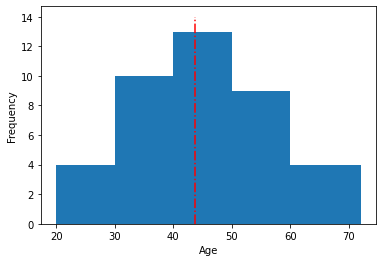

In [20]:
plt.hist(x=marathon['Age'], bins=ageGroup)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.vlines(marathon['Age'].mean(), ymin=0, ymax=14, color='r', linestyles='-.')
plt.show()

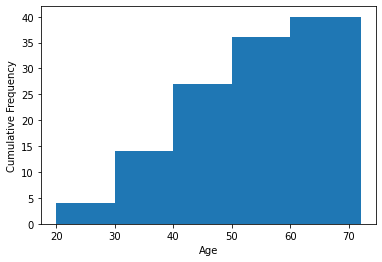

In [21]:
plt.hist(x=marathon['Age'], bins=ageGroup, cumulative=True)
plt.xlabel('Age')
plt.ylabel('Cumulative Frequency')

plt.show()

# 用表格方法汇总两个变量的数据

## [交叉分组表](https://pbpython.com/pandas-pivot-table-explained.html)

In [23]:
restaurant = pd.read_csv(DATA / 'Restaurant.csv')
restaurant

,Restaurant,Quality Rating,Meal Price ($)
0,1,Good,18
1,2,Very Good,22
2,3,Good,28
3,4,Excellent,38
4,5,Very Good,33
...,...,...,...
295,296,Good,17
296,297,Good,16
297,298,Good,15
298,299,Very Good,38


In [24]:
restaurant['bin'] = pd.cut(restaurant['Meal Price ($)'], [0, 19, 29, 39, 49])
restaurant

,Restaurant,Quality Rating,Meal Price ($),bin
0,1,Good,18,"(0, 19]"
1,2,Very Good,22,"(19, 29]"
2,3,Good,28,"(19, 29]"
3,4,Excellent,38,"(29, 39]"
4,5,Very Good,33,"(29, 39]"
...,...,...,...,...
295,296,Good,17,"(0, 19]"
296,297,Good,16,"(0, 19]"
297,298,Good,15,"(0, 19]"
298,299,Very Good,38,"(29, 39]"


In [25]:
pd.crosstab(restaurant['Quality Rating'], restaurant['bin'])

bin,"(0, 19]","(19, 29]","(29, 39]","(39, 49]"
Quality Rating,,,,
Excellent,2,14,28,22
Good,42,40,2,0
Very Good,34,64,46,6


## 辛普森悖论

我们常常合并或综合两个或两个以上的交叉分组表中的数据，生成一个汇总的交叉分组表，以显示两个变量的相关性。

在这种情形下，从两个或多个单独的交叉分组表得到的结论与一个综合的交叉分组表数据得到的结论可能截然相反。

In [26]:
judge = pd.read_csv(DATA / 'SimpsonJudge.csv')
judge

,Judge,Court,Verdict,Count
0,Eric,Municipal,Affirmed,100
1,Eric,Municipal,Overturn,18
2,Eric,Common,Affirmed,29
3,Eric,Common,Overturn,3
4,Richard,Municipal,Affirmed,20
5,Richard,Municipal,Overturn,5
6,Richard,Common,Affirmed,90
7,Richard,Common,Overturn,10


In [27]:
judge.pivot_table(index='Verdict',columns = ['Judge'], values='Count',
                  aggfunc= np.sum, margins = True, margins_name='Total')

Judge,Eric,Richard,Total
Verdict,,,
Affirmed,129,110,239
Overturn,21,15,36
Total,150,125,275


在过去的3年中，两位法官在民事庭和市政庭主持审理案件，他们判决的部分案件被提出上诉。上诉法庭对大多数上诉案件维持原来的判决，但也有部分判决被推翻。以两个变量——判决（维持或推翻）和法庭类型（民事庭或市政庭）为依据，对每位法官构建交叉分组表。然后，假设通过综合法庭类型数据将两个交叉分组表合并。

综合后的交叉分组表包含两个变量——判决（维持或推翻）和法官（勒基特或肯德尔）。这个交叉分组表给出了两位法官的上诉案件被判决维持或推翻的数量。下面的交叉分组表给出了这些结果，括号中的数是其旁边数值的列百分数。

观察列百分数，我们看到法官 Eric 有 86% 的判决（129/150 = 86%）维持原来的判决，法官肯德尔有88%的判决维持原来的判决。

从这个综合交叉分组表，我们可以认为法官肯德尔做得比较好，因为他的判决上诉后维持原来判决的比例比较高。但是，问题随之出现。

下面未综合的交叉分组表是勒基特和肯德尔在两类法庭审理的案件，括号中的数是其旁边数值的列百分数。

In [28]:
judge.pivot_table(index='Verdict',columns = ['Judge', 'Court'], values='Count',
                  aggfunc=np.sum, margins = True, margins_name='Total')

Judge      Eric           Richard           Total
Court    Common Municipal  Common Municipal      
Verdict                                          
Affirmed     29       100      90        20   239
Overturn      3        18      10         5    36
Total        32       118     100        25   275

从法官 Eric 的交叉分组表和列百分数，我们看到他：
- 在民事庭审理的案件中有 91% 上诉案件（29/32=91%）维持原来的判决，
- 在市政庭审理的案件中有 85% 维持原来的判决（100/118=85%）。

从法官 Richard 的交叉分组表和列百分数，我们看到他
- 在民事庭审理的案件中有 90% 上诉案件维持原来的判决，（90/100=90%）
- 在市政庭审理的案件中有 80% 维持原来的判决。（20/25=80%）

因此，当我们未综合数据时，我们看到法官 Eric 有更好的记录，因为法官 Eric 的判决在两个法庭中维持原来的判决的比例更高。

这个结果与我们综合两个法庭数据得到的结论相**矛盾**。最初的交叉分组表表明法官肯德尔有较好的记录。

依据**综合和未综合数据得到的相反结论**被称为辛普森悖论（Simpsons paradox）。

最初的交叉分组表是综合两个法庭分开的交叉分组表中的数据得到的。注意，对两位法官来说，上诉案件**被推翻的比例在市政庭比民事庭要高**。

因为法官 Eric 审理的案件**大多数在市政庭**，因此综合后的数据偏向于法官 Richard。

可是，我们观察两个法庭单独的交叉分组表时，其清楚地显示了法官 Eric 有较好的记录。

因此，对最初的综合交叉分组表，我们看到法庭类型是一个隐藏的变量，当评价两位法官的记录时，它是不可忽视的变量。

由于辛普森悖论的可能性，我们应该认识到根据未综合还是综合交叉分组表数据得出的结论或解释有可能截然相反。

在得出结论之前，你应该审查交叉分组表是综合形式还是未综合形式，以便提出较好的见解和结论。

特别地，当交叉分组表包括综合数据时，你应该审查是否存在可能影响结论的隐藏变量，使得分开的或未综合交叉分组表提供不同的、可能更好的见解和结论。

## [案例分析：种族歧视真的存在吗？](https://sociologicalgobbledygook.com/simpsons-paradox-homework-example.html)

使用的数据集详细解释可以参考：[Simpson’s Paradox: A Data Set and Discrimination Case Study](http://jse.amstat.org/v22n1/mickel.pdf)

由于在分析的过程中会使用许多列联表，如果对如何在 pandas 中使用列联表不太熟悉，可以[参考这里](https://pbpython.com/pandas-pivot-table-explained.html)



In [29]:
df = pd.read_csv(DATA/'paradox_data.csv')
df.head()

,Id,Age Cohort,Age,Gender,Expenditures,Ethnicity
0,10210,13 to 17,17,Female,2113,White not Hispanic
1,10409,22 to 50,37,Male,41924,White not Hispanic
2,10486,0 to 5,3,Male,1454,Hispanic
3,10538,18 to 21,19,Female,6400,Hispanic
4,10568,13 to 17,13,Male,4412,White not Hispanic


In [30]:
pd.pivot_table(df,index=["Ethnicity"],values=["Expenditures"],aggfunc=[np.mean,len])

,mean,len
,Expenditures,Expenditures
Ethnicity,,
American Indian,36438.250000,4
Asian,18392.372093,129
Black,20884.593220,59
Hispanic,11065.569149,376
Multi Race,4456.730769,26
Native Hawaiian,42782.333333,3
Other,3316.500000,2
White not Hispanic,24697.548628,401


通过列联表发现，有一些少数族裔的样本数量偏少，为了方便分析，我们将样本数量少于 200 的少数族裔作为一组。

In [31]:
def bin_ethnicity(eth):
    if eth == "White not Hispanic":
        return "white"
    elif eth == "Hispanic":
        return "hispanic"
    return "others"
df["binned_eth"] =np.array([bin_ethnicity(x) for x in list(df["Ethnicity"])])
pd.pivot_table(df,index=["binned_eth"],values=["Expenditures"],aggfunc=[np.sum,np.mean,len])

,sum,mean,len
,Expenditures,Expenditures,Expenditures
binned_eth,,,
hispanic,4160654,11065.569149,376
others,4001415,17943.565022,223
white,9903717,24697.548628,401


如果我们只看汇总之后的数据，我们会发现：
- 无论是看均值、汇总数据或者是人数，白人族裔的治疗费用和治疗数量明显高于其他族裔

如果我们没有深入探究数据分布，或许光凭借这一个数据结果，我们就可以得出结论：的确存在种族歧视。

由于我们有两个定类变量（`性别`和）和两个定性变量（`年龄`和`治疗费用`），使用 `swarmplot` 可以帮助我们快速了解数据的分布情况：

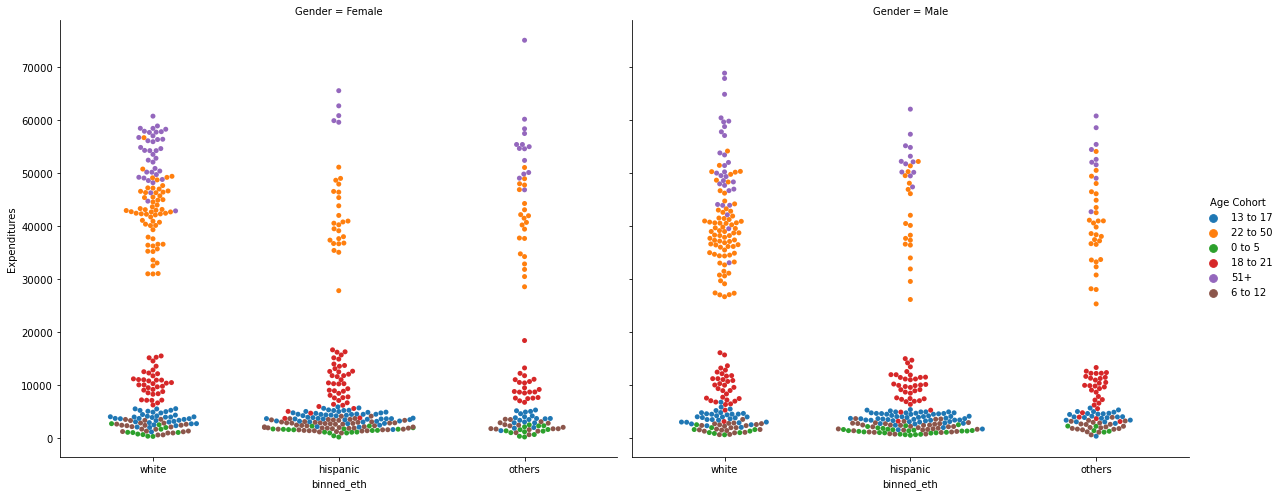

In [32]:
sb.catplot(x="binned_eth", y="Expenditures", hue="Age Cohort", col="Gender", kind="swarm", height=7, aspect=1.2, data=df)
plt.show()

从可视化结果来看
- 22-50 和 51+ 两组的治疗费用要显著高于其他年龄段
- 未成年阶段的治疗费用要显著低于其他年龄段
- 大多数西裔在青少年阶段就已经投入了经费进行治疗

接下来我们结合年龄段，得出列联表

In [33]:
pd.pivot_table(df,index=["Age Cohort","binned_eth"], values="Expenditures", aggfunc=[np.sum,np.mean,len])

sum          mean          len
                      Expenditures  Expenditures Expenditures
Age Cohort binned_eth                                        
0 to 5     hispanic          61301   1393.204545           44
           others            27414   1523.000000           18
           white             27338   1366.900000           20
13 to 17   hispanic         407394   3955.281553          103
           others           162608   3871.619048           42
           white            261592   3904.358209           67
18 to 21   hispanic         776868   9959.846154           78
           others           491770   9457.115385           52
           white            699181  10133.057971           69
22 to 50   hispanic        1759737  40924.116279           43
           others          1982607  39652.140000           50
           white           5344954  40187.624060          133
51+        hispanic         944945  55585.000000           17
           others          1252128  54440.347826           23
           white           3476248  52670.424242           66
6 to 12    hispanic         210409   2312.186813           91
           others            84888   2233.894737           38
           white             94404   2052.260870           46

结合上面的列联表和 `swarmplot` 的可视化结果，我们或许可以得知，汇总数据中白人族裔的治疗费用比其他族裔要高的原因：
- 白人族裔接受治疗的时间比较晚，大多数集中在 22-50 和 51+ 两组，由于这两组的治疗费用要显著高于其他年龄段，因此汇总数据才会得出“白人族裔的治疗费用和治疗数量明显高于其他族裔”这一结论
- 每个案例的治疗费用均值，其实都差不多（白人族裔的治疗费用均值在许多年龄段中，反而是最少的）

因此我们可以得出结论：种族歧视并不存在。

除此之外，我们还可以结合其他变量如：
- 各族裔占总人口的比例
- 不同地域族裔分布

或许分析的结果又有不同。

# 用图形显示方法汇总两个变量的数据

## 散点图和趋势线

In [2]:
stereo = pd.read_csv(DATA / 'Stereo.csv')
stereo

,Week,No. of Commercials,Sales Volume
0,1,2,50
1,2,5,57
2,3,1,41
3,4,3,54
4,5,4,54
5,6,1,38
6,7,5,63
7,8,3,48
8,9,4,59
9,10,2,46


<AxesSubplot:xlabel='No. of Commercials', ylabel='Sales Volume'>

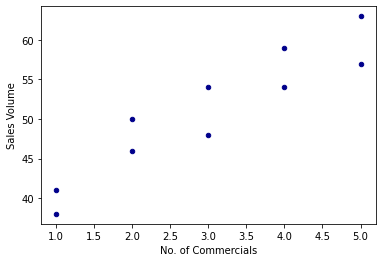

In [3]:
stereo.plot.scatter(x='No. of Commercials', y='Sales Volume', c='DarkBlue')

<AxesSubplot:xlabel='No. of Commercials', ylabel='Sales Volume'>

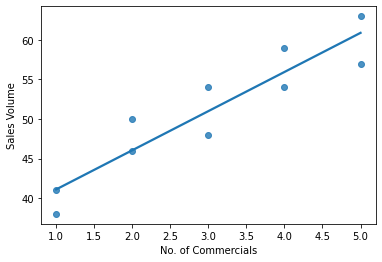

In [4]:
sb.regplot(x='No. of Commercials', y='Sales Volume', ci = None, data = stereo)

<AxesSubplot:xlabel='bin'>

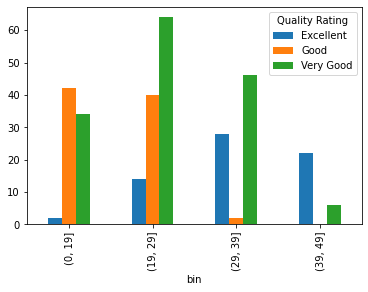

In [37]:
pd.crosstab(restaurant['bin'], restaurant['Quality Rating']).plot(kind='bar')

<AxesSubplot:xlabel='bin'>

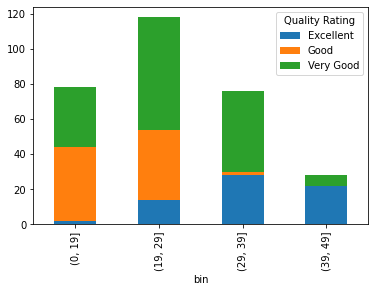

In [38]:
pd.crosstab(restaurant['bin'], restaurant['Quality Rating']).plot(kind='bar', stacked=True)

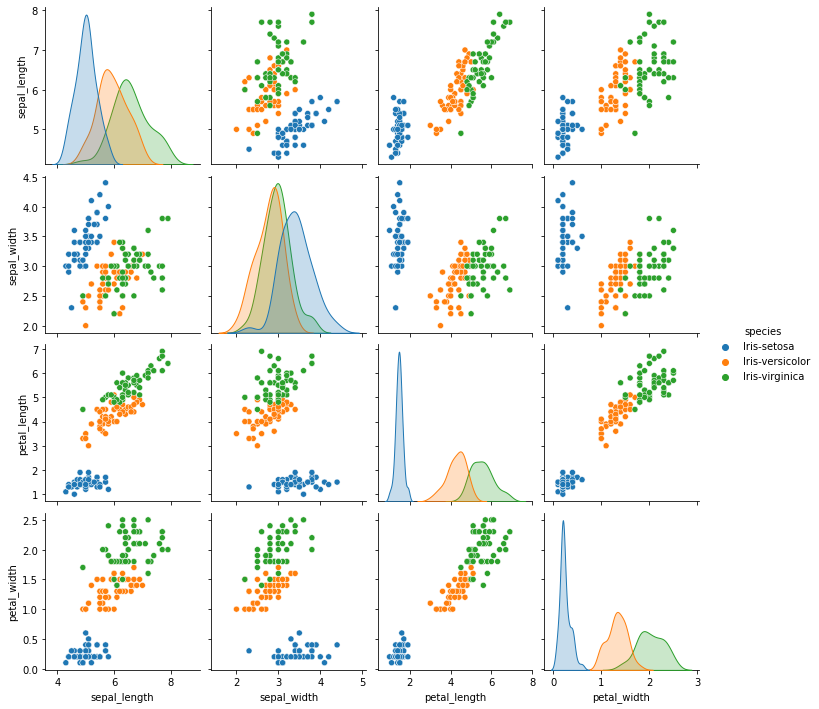

In [8]:
iris = pd.read_csv(DATA / 'iris.csv')
iris.head()
# 散点图矩阵
sb.pairplot(iris, hue="species")